In [ ]:
import pandas as pd

csv_path = '/content/drive/MyDrive/Colab Notebooks/Steam_Store_Games/steam.csv'

try:
    df = pd.read_csv(csv_path)
    print("CSV loaded successfully!")
    display(df.head(10))
except FileNotFoundError:
    print(f"Error: The file was not found at {csv_path}")
except Exception as e:
    print(f"An error occurred: {e}")

CSV loaded successfully!


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


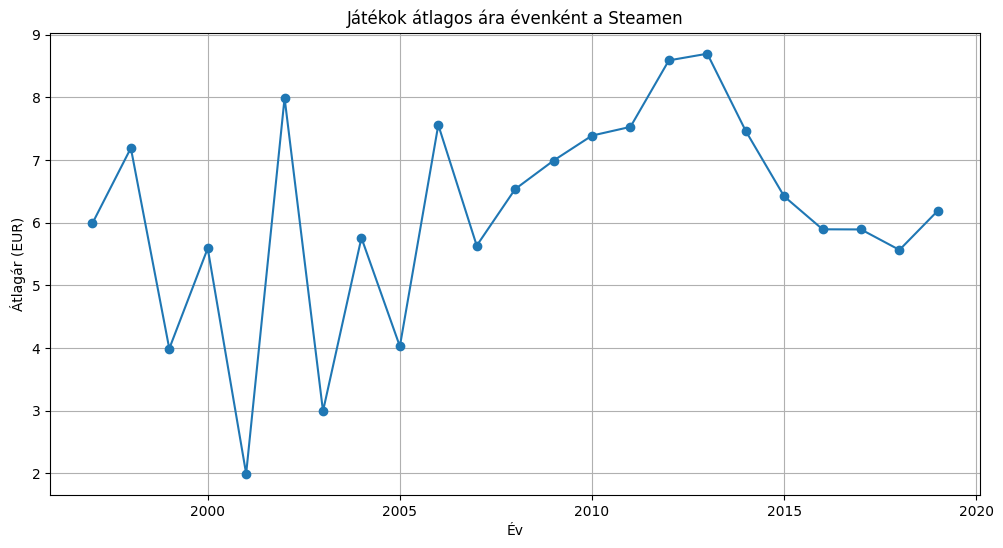

In [ ]:
import matplotlib.pyplot as plt

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

year_price = df.groupby('year')['price'].mean()

plt.figure(figsize=(12,6))
plt.plot(year_price.index, year_price.values, marker='o')
plt.title("Játékok átlagos ára évenként a Steamen")
plt.xlabel("Év")
plt.ylabel("Átlagár (EUR)")
plt.grid(True)
plt.show()


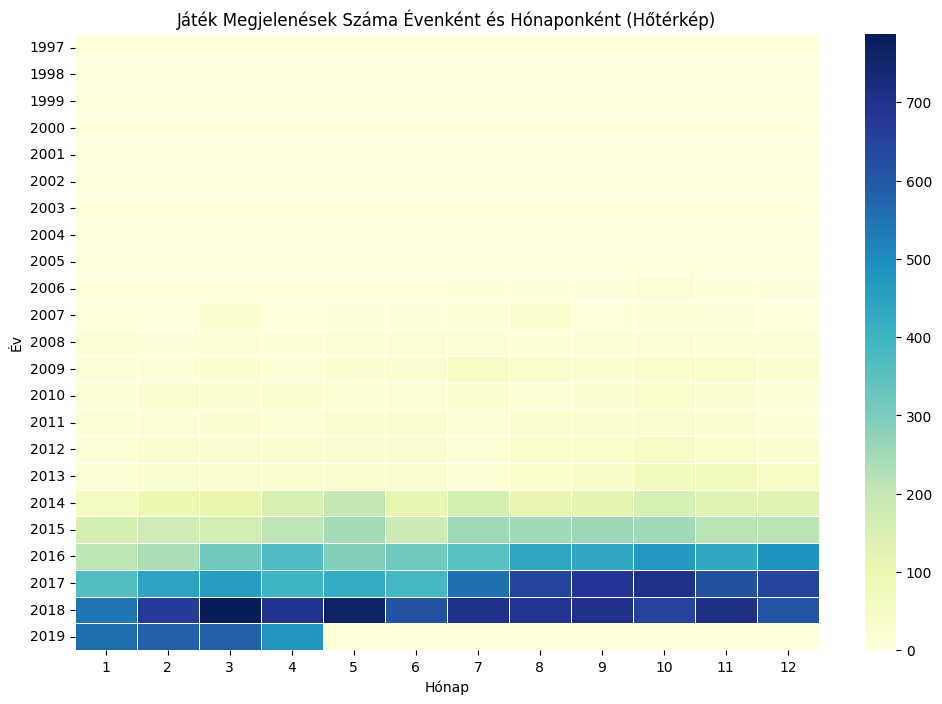

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['month'] = df['release_date'].dt.month
releases_heatmap_data = df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(releases_heatmap_data, cmap="YlGnBu", fmt="d", linewidths=.5)
plt.title('Játék Megjelenések Száma Évenként és Hónaponként (Hőtérkép)')
plt.xlabel('Hónap')
plt.ylabel('Év')
plt.show()

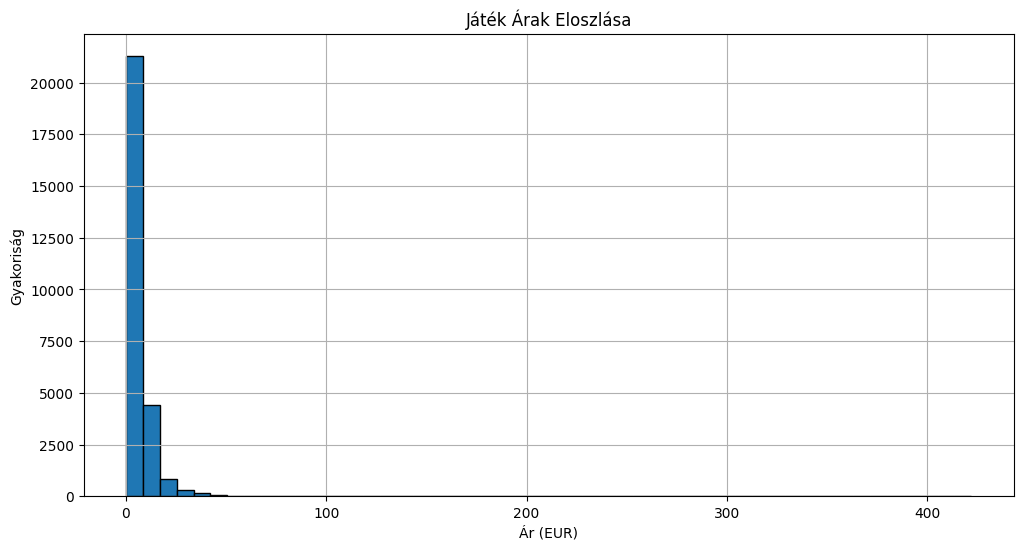

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Játék Árak Eloszlása')
plt.xlabel('Ár (EUR)')
plt.ylabel('Gyakoriság')
plt.grid(True)
plt.show()

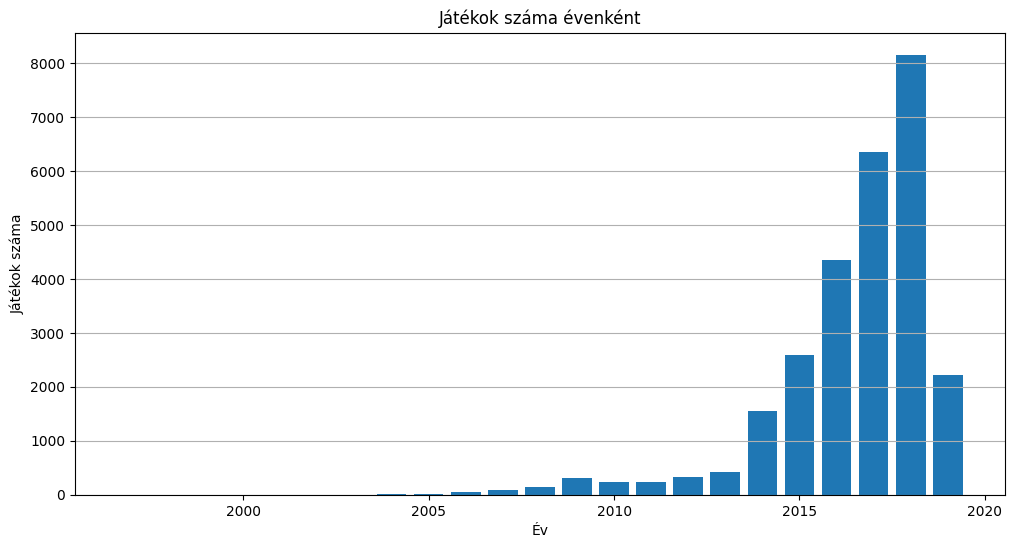

In [ ]:
import matplotlib.pyplot as plt

if 'year' not in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['year'] = df['release_date'].dt.year

games_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.title('Játékok száma évenként')
plt.xlabel('Év')
plt.ylabel('Játékok száma')
plt.grid(axis='y')
plt.show()

<Figure size 1200x800 with 0 Axes>

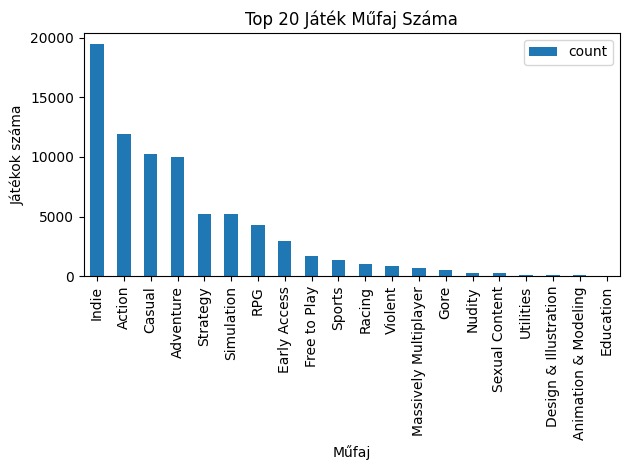

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

genres_list = df['genres'].str.split(';').sum()
genre_counts = Counter(genres_list)

genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

top_n = 20
plt.figure(figsize=(12, 8))
genre_df.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Játék Műfaj Száma')
plt.xlabel('Műfaj')
plt.ylabel('Játékok száma')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

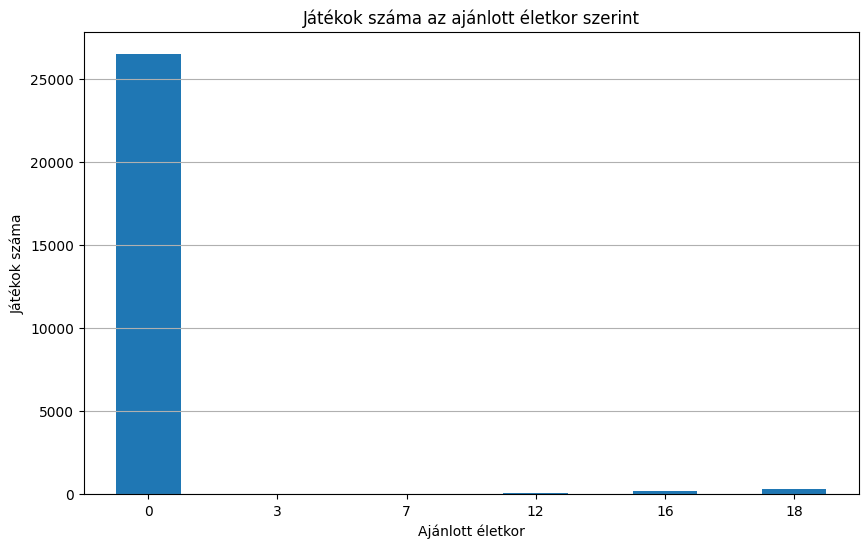

In [ ]:
import matplotlib.pyplot as plt

age_counts = df['required_age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Játékok száma az ajánlott életkor szerint')
plt.xlabel('Ajánlott életkor')
plt.ylabel('Játékok száma')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<Figure size 1000x600 with 0 Axes>

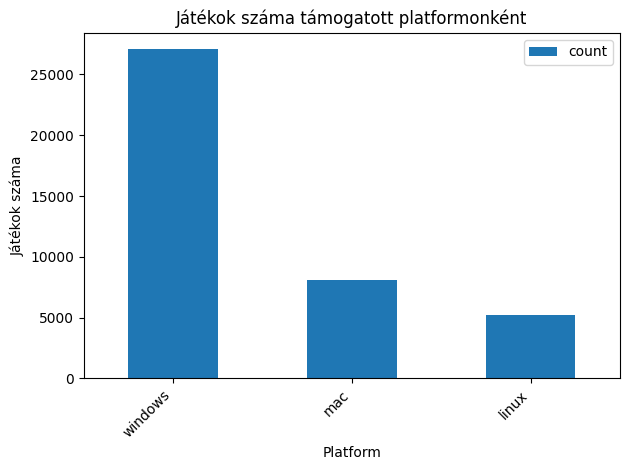

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

platforms_list = df['platforms'].str.split(';').sum()
platform_counts = Counter(platforms_list)

platform_df = pd.DataFrame.from_dict(platform_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
platform_df.plot(kind='bar')
plt.title('Játékok száma támogatott platformonként')
plt.xlabel('Platform')
plt.ylabel('Játékok száma')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

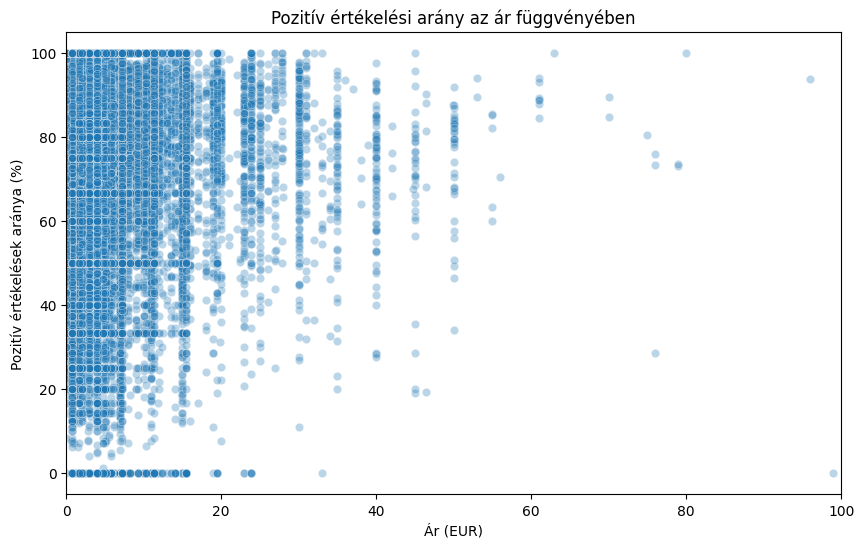

In [ ]:
df['rating_ratio'] = df['positive_ratings'] / (df['positive_ratings'] + df['negative_ratings'] + 1e-9)

df['rating_percent'] = df['rating_ratio'] * 100

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='rating_percent', alpha=0.3)
plt.xlim(0, 100)
plt.title("Pozitív értékelési arány az ár függvényében")
plt.xlabel("Ár (EUR)")
plt.ylabel("Pozitív értékelések aránya (%)")
plt.show()

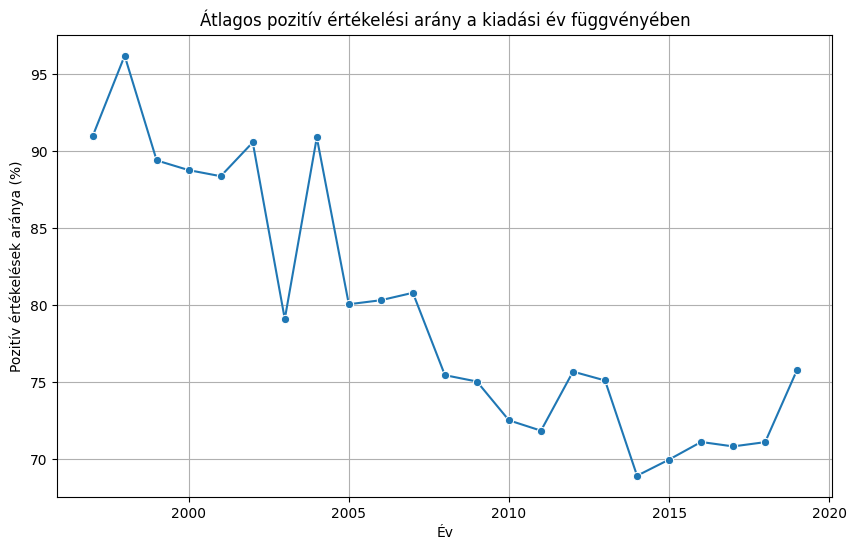

In [ ]:
yearly = df.groupby('year')['rating_percent'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly.index, y=yearly.values, marker="o")
plt.title("Átlagos pozitív értékelési arány a kiadási év függvényében")
plt.xlabel("Év")
plt.ylabel("Pozitív értékelések aránya (%)")
plt.grid(True)
plt.show()

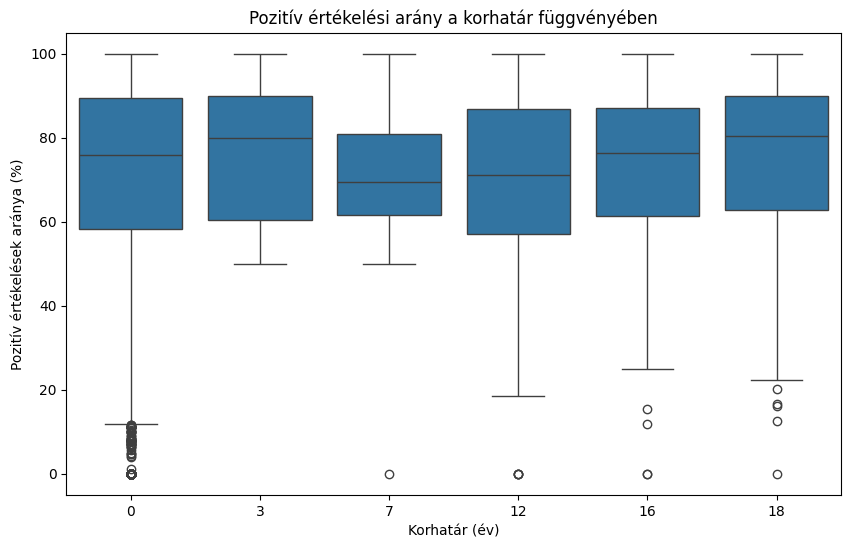

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='required_age', y='rating_percent')
plt.title("Pozitív értékelési arány a korhatár függvényében")
plt.xlabel("Korhatár (év)")
plt.ylabel("Pozitív értékelések aránya (%)")
plt.show()